In [1]:
import zipfile
import os
import json

In [4]:
folder_path = "free-news-datasets/News_Datasets/"

In [19]:
only_text = []
for filename in os.listdir(folder_path):
    if(filename.endswith(".zip")):
        with zipfile.ZipFile(os.path.join(folder_path, filename), 'r') as zip_ref:
            for json_file in zip_ref.namelist():
                with zip_ref.open(json_file) as file:
                    data = json.load(file)
                    if(data.get('language', '').lower() == "english"):
                        text = data.get('text', '')
                        if text:
                            only_text.append(text)
print(f"Total Documents extracted: {len(only_text)}")


Total Documents extracted: 63950


## Word Frequency Plot of unprocessed data

In [20]:
from collections import Counter
from matplotlib import pyplot as plt

In [21]:
corpus_text = " ".join(only_text).lower()
words = corpus_text.split()
word_counts = Counter(words)
top_20 = word_counts.most_common(20)

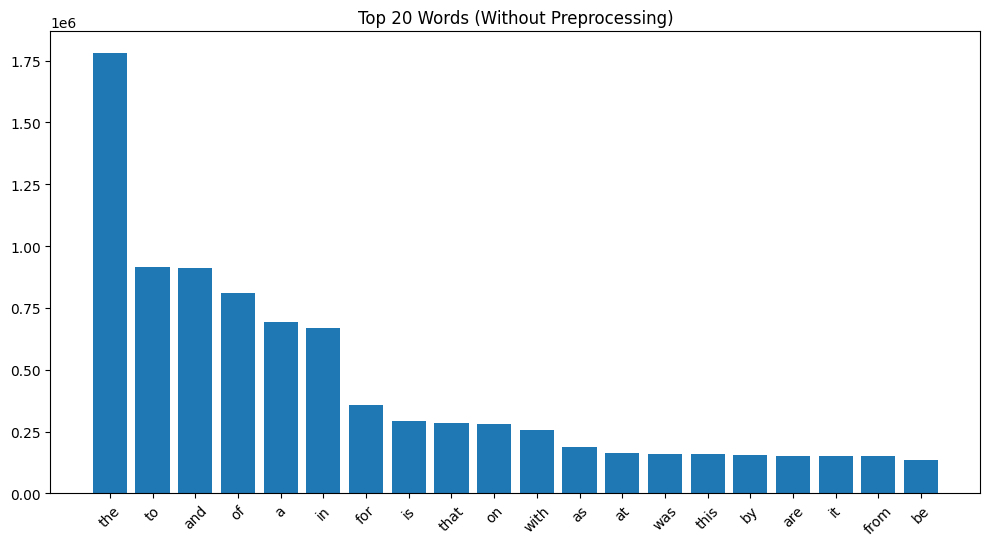

In [22]:
plt.figure(figsize=(12,6))
plt.bar([w for w, _ in top_20], [c for _, c in top_20])
plt.xticks(rotation=45)
plt.title("Top 20 Words (Without Preprocessing)")
plt.show()

In [23]:
count_of_word_counts = Counter(word_counts.values())
x = sorted(count_of_word_counts.keys())
y = [count_of_word_counts[k] for k in x]

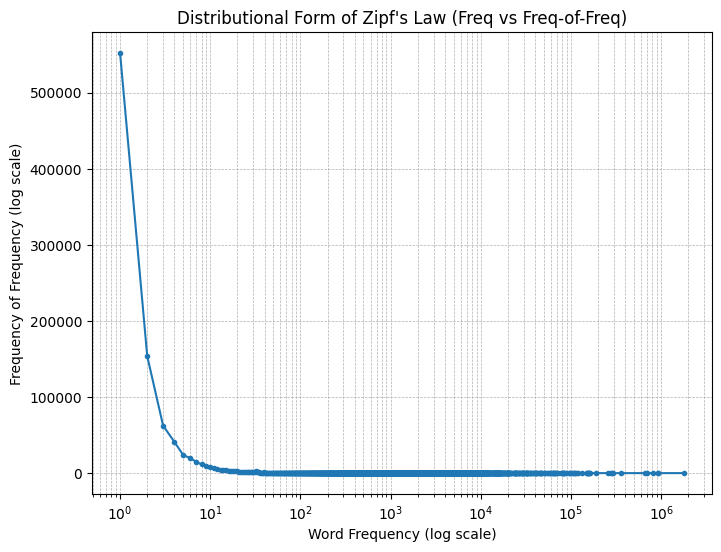

In [24]:
plt.figure(figsize=(8,6))
plt.plot(x, y, marker=".", linestyle="-")
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Word Frequency (log scale)")
plt.ylabel("Frequency of Frequency (log scale)")
plt.title("Distributional Form of Zipf's Law (Freq vs Freq-of-Freq)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

## Preprocessing

In [26]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 

In [27]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

In [ ]:
def preprocess_text(text):
     
    text = text.lower() # Lowercasing
    
    
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) #  Removing URLs
    
    
    text = re.sub(r'<.*?>', '', text)  #  Removing HTML tags
    
    
    text = re.sub(r'[^a-z\s]', ' ', text)  # Remove special symbols & punctuation
    
    # Tokenization
    tokens = word_tokenize(text)
    
    #  stopwords & very short tokens removal
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

In [30]:
tokens_after_preprocessing = preprocess_text(corpus_text)
word_counts_after_preprocessing = Counter(tokens_after_preprocessing)


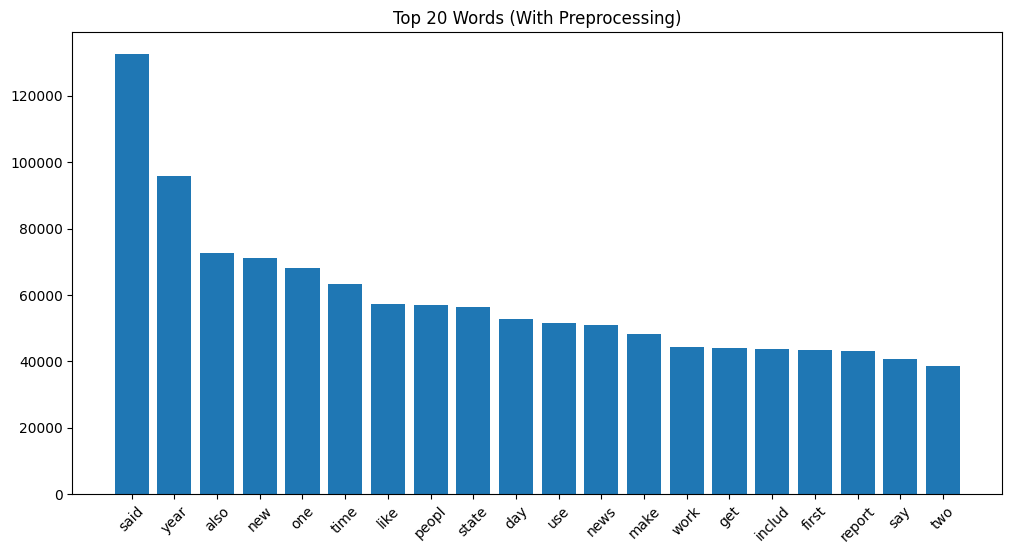

In [31]:
top_20_after_preprocessing = word_counts_after_preprocessing.most_common(20)
plt.figure(figsize=(12,6))
plt.bar([w for w, _ in top_20_after_preprocessing], [c for _, c in top_20_after_preprocessing])
plt.xticks(rotation=45)
plt.title("Top 20 Words (With Preprocessing)")
plt.show()

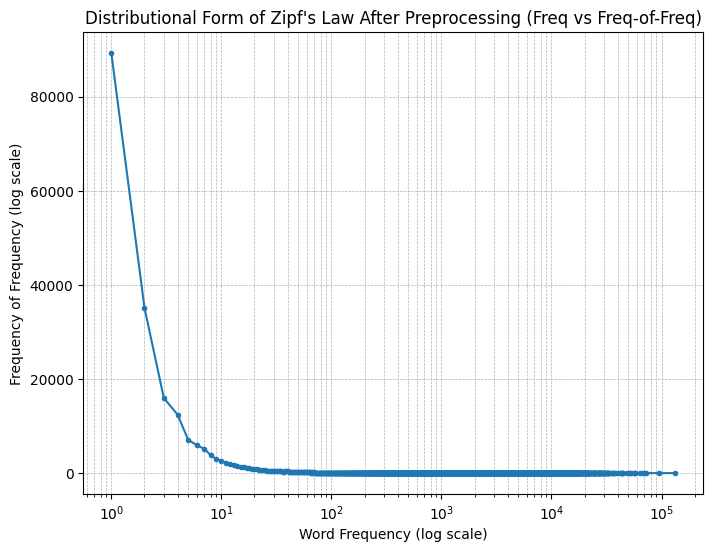

In [32]:
count_of_word_counts_after_preprocessing = Counter(word_counts_after_preprocessing.values())
x = sorted(count_of_word_counts_after_preprocessing.keys())
y = [count_of_word_counts_after_preprocessing[k] for k in x]
plt.figure(figsize=(8,6))
plt.plot(x, y, marker=".", linestyle="-")
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Word Frequency (log scale)")
plt.ylabel("Frequency of Frequency (log scale)")
plt.title("Distributional Form of Zipf's Law After Preprocessing (Freq vs Freq-of-Freq)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()